# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import KNNImputer
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Reading the Data

In [2]:
df = pd.read_csv('Train.csv')
df.shape

(8523, 12)

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Describing the Data

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


# Checking Missing and Unique Values

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Counts of the Classes in the Categorical Columns

In [10]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [12]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

# Dropping Columns as not required for analysis

In [15]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

# Imputing missing Value of Numerical Column with Mean

In [16]:
df['Item_Weight'].fillna(value=df['Item_Weight'].mean(),inplace=True)

In [17]:
df['Item_Weight'].isnull().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


# Imputing the Missing Value in Categorical Column with Weights

In [19]:
for i in df.columns:
    if df[i].dtypes == 'object':
        a = df.groupby(i).Item_Outlet_Sales.agg('mean')/100
        a = a.round()
        print(a)

Item_Fat_Content
LF         21.0
Low Fat    22.0
Regular    22.0
low fat    21.0
reg        20.0
Name: Item_Outlet_Sales, dtype: float64
Item_Type
Baking Goods             20.0
Breads                   22.0
Breakfast                21.0
Canned                   22.0
Dairy                    22.0
Frozen Foods             21.0
Fruits and Vegetables    23.0
Hard Drinks              21.0
Health and Hygiene       20.0
Household                23.0
Meat                     22.0
Others                   19.0
Seafood                  23.0
Snack Foods              23.0
Soft Drinks              20.0
Starchy Foods            24.0
Name: Item_Outlet_Sales, dtype: float64
Outlet_Size
High      23.0
Medium    27.0
Small     19.0
Name: Item_Outlet_Sales, dtype: float64
Outlet_Location_Type
Tier 1    19.0
Tier 2    23.0
Tier 3    23.0
Name: Item_Outlet_Sales, dtype: float64
Outlet_Type
Grocery Store         3.0
Supermarket Type1    23.0
Supermarket Type2    20.0
Supermarket Type3    37.0
Name: Item_Out

In [20]:
for i in df.columns:
    if df[i].dtypes == 'object':
        a = df.groupby(i).Item_Outlet_Sales.agg('mean')/100
        a = a.round()
        a1 = a.to_dict()
        df = df.replace({i:a1})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   float64
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   float64
 7   Outlet_Location_Type       8523 non-null   float64
 8   Outlet_Type                8523 non-null   float64
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 666.0 KB


## Imputing with KNNImputer

In [22]:
imputer = KNNImputer()

In [23]:
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [24]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Q-Q Plot of the Data

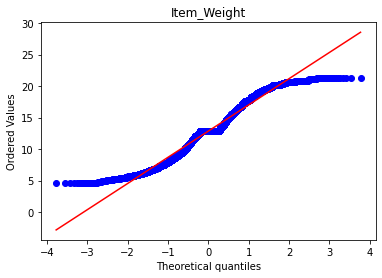

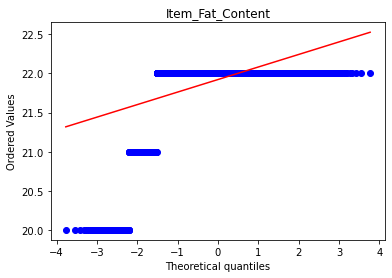

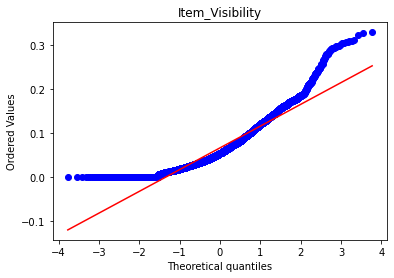

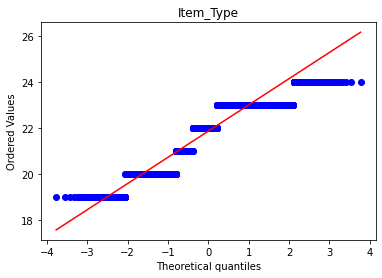

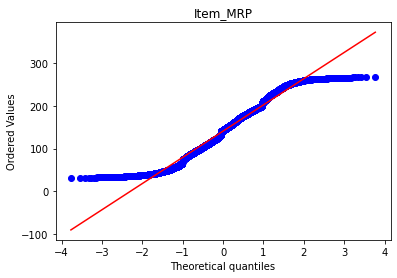

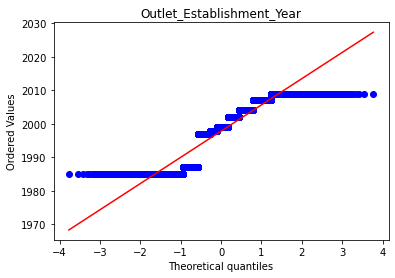

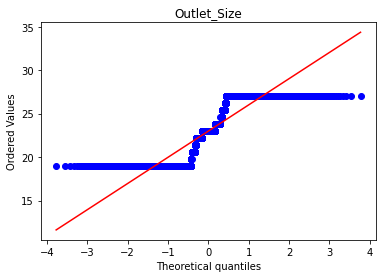

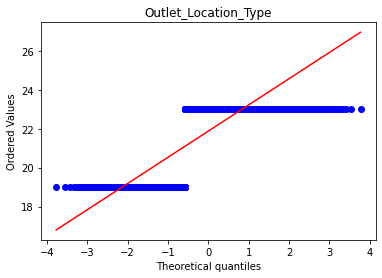

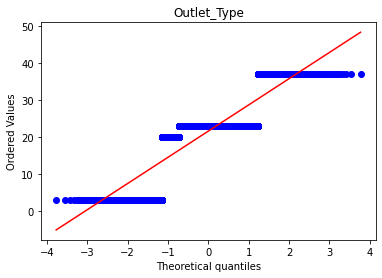

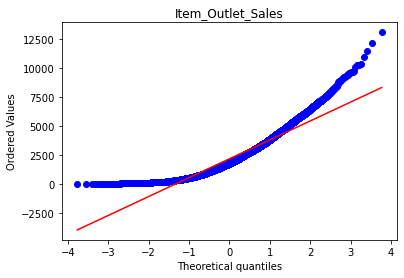

In [25]:
for i in df.columns:
    stats.probplot(df[i], dist="norm", plot=plt)
    plt.title(i)
    plt.show()

# Checking Correlation, Skewness, Kurtosis

In [26]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,0.003704,-0.012049,0.047152,0.024756,-0.008301,0.004226,-0.003965,-0.002166,0.011550
Item_Fat_Content,0.003704,1.000000,-0.000845,-0.007871,0.015030,-0.007494,-0.001608,-0.001229,0.013358,0.020923
Item_Visibility,-0.012049,-0.000845,1.000000,0.020731,-0.001315,-0.074834,-0.127378,-0.061346,-0.248182,-0.128625
Item_Type,0.047152,-0.007871,0.020731,1.000000,0.099855,-0.000007,0.009703,0.009252,0.011441,0.066970
Item_MRP,0.024756,0.015030,-0.001315,0.099855,1.000000,0.005020,-0.001808,0.001229,-0.000530,0.567574
Outlet_Establishment_Year,-0.008301,-0.007494,-0.074834,-0.000007,0.005020,1.000000,0.030141,0.201690,-0.108415,-0.049135
Outlet_Size,0.004226,-0.001608,-0.127378,0.009703,-0.001808,0.030141,1.000000,0.163355,0.502419,0.246319
Outlet_Location_Type,-0.003965,-0.001229,-0.061346,0.009252,0.001229,0.201690,0.163355,1.000000,0.227931,0.111287
Outlet_Type,-0.002166,0.013358,-0.248182,0.011441,-0.000530,-0.108415,0.502419,0.227931,1.000000,0.489444
Item_Outlet_Sales,0.011550,0.020923,-0.128625,0.066970,0.567574,-0.049135,0.246319,0.111287,0.489444,1.000000


### There is no significant Correlation

In [27]:
df.skew()

Item_Weight                  0.090561
Item_Fat_Content            -4.375895
Item_Visibility              1.167091
Item_Type                   -0.530813
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.002714
Outlet_Location_Type        -0.979119
Outlet_Type                 -0.711187
Item_Outlet_Sales            1.177531
dtype: float64

In [28]:
df.kurtosis()

Item_Weight                  -0.860294
Item_Fat_Content             19.806567
Item_Visibility               1.679445
Item_Type                    -0.973791
Item_MRP                     -0.889769
Outlet_Establishment_Year    -1.205694
Outlet_Size                  -1.630200
Outlet_Location_Type         -1.041570
Outlet_Type                   1.202335
Item_Outlet_Sales             1.615877
dtype: float64

### Checking if there is any Value less or equal to Zero

In [29]:
c = 0
for i in df['Item_Outlet_Sales'].values:
    if i <=0:
        c+=1
print(c)

0


### Taking a log transform of the Target as the datas are large

In [30]:
df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales'])

# Checking the VIF

In [31]:
b,a = dmatrices('Item_Outlet_Sales ~ Item_Weight + Item_Fat_Content + Item_Visibility + Item_Type + Item_MRP + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type + Outlet_Type',data=df,return_type='dataframe')

vif  = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

,VIF,variable
0,66251.481421,Intercept
1,1.003016,Item_Weight
2,1.000642,Item_Fat_Content
3,1.079067,Item_Visibility
4,1.013062,Item_Type
5,1.010783,Item_MRP
6,1.091502,Outlet_Establishment_Year
7,1.352781,Outlet_Size
8,1.117812,Outlet_Location_Type
9,1.504218,Outlet_Type


# Fitting OLS on the Data and checking significant features

In [32]:
mod = sm.OLS(b,a)
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2230.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:13:03   Log-Likelihood:                -7076.3
No. Observations:                8523   AIC:                         1.417e+04
Df Residuals:                    8513   BIC:                         1.424e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -33.4659      1.548    -21.612      0.000     -36.501     -30.431
Item_Weight                  -0.0005      0.001     -0.362      0.717      -0.003       0.002
Item_Fat_Content              0.0012      0.019      0.064      0.949      -0.036       0.039
Item_Visibility              -0.3400      0.121     -2.807      0.005      -0.577      -0.103
Item_Type                     0.0012      0.005      0.252      0.801      -0.008       0.011
Item_MRP                      0.0083   9.71e-05     85.614      0.000       0.008       0.009
Outlet_Establishment_Year     0.0193      0.001     25.748      0.000       0.018       0.021
Outlet_Size                  -0.0073      0.002     -3.510      0.000      -0.011      -0.003
Outlet_Location_Type         -0.0306      0.004     -8.629      0.000      -0.037      -0.024
Outlet_Type                   0.0822      0.001     94.244      0.000       0.081       0.084
==============================================================================
Omnibus:                      574.569   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.396
Skew:                          -0.643   Prob(JB):                    2.73e-156
Kurtosis:                       3.603   Cond. No.                     5.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BP Test for Homoscedasticity

In [33]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(fii.resid, fii.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 59.06817253382447),
 ('p-value', 2.0263437085706146e-09),
 ('f-value', 6.6011788877372),
 ('f p-value', 1.887366242408096e-09)]

## Performing OLS with selected features

In [34]:
d,c = dmatrices('Item_Outlet_Sales ~ Item_Visibility + Item_MRP + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type + Outlet_Type',data=df,return_type='dataframe')

mod = sm.OLS(d,c)
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3346.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:13:03   Log-Likelihood:                -7076.4
No. Observations:                8523   AIC:                         1.417e+04
Df Residuals:                    8516   BIC:                         1.422e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -33.4250      1.485    -22.516      0.000     -36.335     -30.515
Item_Visibility              -0.3386      0.121     -2.797      0.005      -0.576      -0.101
Item_MRP                      0.0083   9.66e-05     86.104      0.000       0.008       0.009
Outlet_Establishment_Year     0.0193      0.001     25.757      0.000       0.018       0.021
Outlet_Size                  -0.0073      0.002     -3.513      0.000      -0.011      -0.003
Outlet_Location_Type         -0.0305      0.004     -8.629      0.000      -0.037      -0.024
Outlet_Type                   0.0822      0.001     94.289      0.000       0.081       0.084
==============================================================================
Omnibus:                      573.764   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.143
Skew:                          -0.642   Prob(JB):                    5.11e-156
Kurtosis:                       3.602   Cond. No.                     4.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(fii.resid, fii.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 55.48004553005167),
 ('p-value', 3.7079244313482766e-10),
 ('f-value', 9.299615280396784),
 ('f p-value', 3.4600542222339293e-10)]

### Distribution PLot of the Residual

F:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


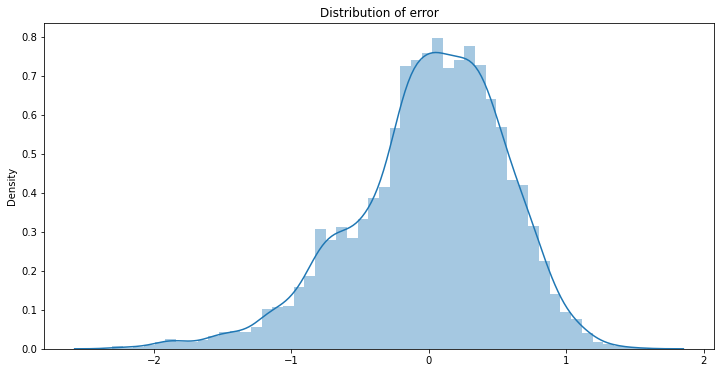

In [36]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fii.resid)
plt.show()

### Q-Q Plot of the Residual

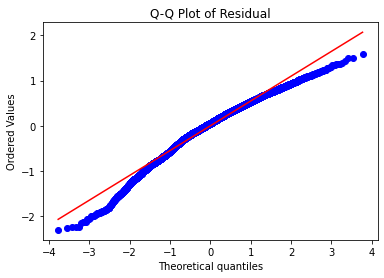

In [37]:
stats.probplot(fii.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residual')
plt.show()

# Performing Feature Selection

In [38]:
features = ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

X = df[features]
y = df['Item_Outlet_Sales']

In [39]:
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.04805802, 0.00781136, 0.06207212, 0.03253502, 0.34381472,
       0.01843357, 0.04890509, 0.00558222, 0.43278788])

<AxesSubplot:>

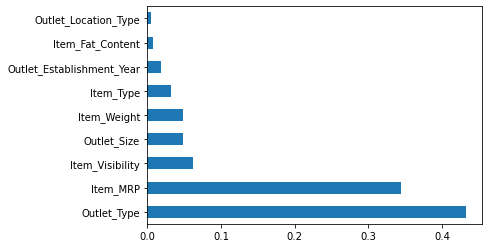

In [40]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [41]:
reduc_feature = ['Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Splitting Features and Target and Train Test Split

In [42]:
X = df[reduc_feature]
#y = df['Item_Outlet_sales']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
sc = StandardScaler()

In [45]:
X_train = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)

# Linear Regression

In [46]:
linear = LinearRegression()

In [47]:
linear.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = linear.predict(X_test)

In [49]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.7188321672286122

In [50]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.5447387073290368

In [51]:
np.mean(cross_val_score(linear,X_train,y_train,cv=5))

0.6967278881132104

In [52]:
y_pred = linear.predict(X_test)

In [53]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.7188321672286122

# Lasso Regression

In [54]:
A = df[features]
b = df['Item_Outlet_Sales']

In [55]:
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,random_state=42)

In [56]:
lso = Lasso(alpha=0.9)

In [57]:
lso.fit(A_train,b_train)

Lasso(alpha=0.9)

In [58]:
y_pred_ls = lso.predict(A_test)

In [59]:
r2 = metrics.r2_score(b_test, y_pred_ls)
r2

0.6816832723384596

In [60]:
np.mean(cross_val_score(lso,A_train,b_train,cv=5))

0.6686425209353113

In [61]:
y_pred_lso = lso.predict(A_test)

In [62]:
r2 = metrics.r2_score(b_test, y_pred_lso)
r2

0.6816832723384596

### Lasso with feature selection

In [63]:
param = np.abs(lso.coef_)
param

array([0.        , 0.        , 0.        , 0.        , 0.00808718,
       0.00301072, 0.        , 0.        , 0.0649207 ])

In [64]:
np.array(features)[param>0]

array(['Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type'],
      dtype='<U25')

In [67]:
A = df[['Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type']]
b = df['Item_Outlet_Sales']

In [68]:
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,random_state=42)

In [69]:
lso.fit(A_train,b_train)

Lasso(alpha=0.9)

In [70]:
y_pred_ls = lso.predict(A_test)

In [71]:
r2 = metrics.r2_score(b_test, y_pred_ls)
r2

0.6816832607465976

# Ridge Regression

In [72]:
rdg = Ridge()

In [73]:
rdg.fit(X_train,y_train)

Ridge()

In [74]:
y_pred_rdg = rdg.predict(X_test)

In [75]:
r2_rdg = metrics.r2_score(y_test,y_pred_rdg)
r2_rdg

0.7188215690231836

In [76]:
np.mean(cross_val_score(rdg,X_train,y_train,cv=5))

0.6967280667824486

In [77]:
y_pred_rdg = rdg.predict(X_test)

In [78]:
r2_rdg = metrics.r2_score(y_test,y_pred_rdg)
r2_rdg

0.7188215690231836

# DecisionTree Regression

In [79]:
dtr = DecisionTreeRegressor()

In [80]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [81]:
y_pred_dtr = dtr.predict(X_test)

In [82]:
r2_dtr = metrics.r2_score(y_test,y_pred_dtr)
r2_dtr

0.4735354138058614

In [83]:
np.mean(cross_val_score(dtr,X_train,y_train,cv=5))

0.46578570463167035

In [84]:
y_pred_dtr = dtr.predict(X_test)

In [85]:
r2_dtr = metrics.r2_score(y_test,y_pred_dtr)
r2_dtr

0.4735354138058614